####  <span style='color:Blue'> Dane do analizy </span>:  Credit_Card.xlsx (na przykładzie Iris.csv)
####  <span style='color:Blue'> Cel badania </span>:  Klasyfikacja kwiatów.
####   <span style='color:Blue'> Klasyfikator </span>:  Decision tree i Random forest. 

##### <span style='color:Blue'>  Zadanie 1 </span>: Ładowanie i wstępna eksploracja
* Liczba rekordów, liczba cech
* Rozkład kategorii. Czy dane są zbalansowane?
##### <span style='color:Blue'>  Zadanie 2 </span>:  Podział zbiór danych na podzbiory w stosunku 0.7:0.3.
##### <span style='color:Blue'>  Zadanie 3 </span>:  Tworzenie klasyfikatora <i>Decision tree</i> i wizualizacja.
##### <span style='color:Blue'>  Zadanie 4 </span>:  Optymalizacja hyperparametrów DT.
* Głębokość drzewa (max_depth = 2,4,)
* Kryterium podziału (criterion = 'gini', 'entropy')
* Miara oceny: roc-auc.
<b>Wniosek</b>: Które parametry są optymalne?
##### <span style='color:Blue'>  Zadanie 5 </span> : Użyć <i>GridSearchCV</i> do wyszukiwania optymalnych hyperparametrów DT.
* Głębokość drzewa (max_depth = 2,4,6,8,10,12)
* Kryterium podziału (criterion = 'gini', 'entropy', 'log_loss')
* Miara oceny: roc-auc.
<b>Wniosek</b>: Które parametry są optymane?

##### <span style='color:Blue'>  Zadanie 6 </span> : Tworzenie klasyfikatora <i> Random forest </i> i wizualizacja.
##### <span style='color:Blue'>  Zadanie 7 </span>: Użyć <i>GridSearchCV</i> do wyszukiwania optymalnych hyperparametrów RF.
##### <span style='color:Blue'>  Zadanie 8 </span>:  Użyć algorytmów do zbalansowania danych:
* OverSampling
* UnderSampling
* SMOTE
* Trenować DT i RF na zbalansowanych zbiorach  i testować modele z zbiorze testowym
##### <span style='color:Blue'>  Zadanie 9 </span>: Napisać podsumowanie:
* Trafność (Accuracy) i miarę F1 klasyfikacji algorytmu DT 
* Trafność (Accuracy) i miarę F1 klasyfikacji algorytmu RF
* Trafność (Accuracy) i miarę F1 klasyfikacji algorytmu DT wykonanego na zbalansowanym zbiorze.
* Trafność (Accuracy) i miarę F1 klasyfikacji algorytmu RF wykonanego na zbalansowanym zbiorze.


In [4]:
#Importowanie danych z lokalnego dysku  
import pandas as pd 
path = 'Datasets/'
df = pd.read_csv(path + 'iris_float_class.csv', header = None, names=['sepal_len', 'sepal_with', 'petal_len', 'petal_width', 'class'])
print(df.shape)
df.head(10)

(150, 5)


,sepal_len,sepal_with,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_with   150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Rozkład kategorii.
class_freq = (df.groupby('class').size())
print (type(class_freq))
print(class_freq)

<class 'pandas.core.series.Series'>
class
1    50
2    50
3    50
dtype: int64


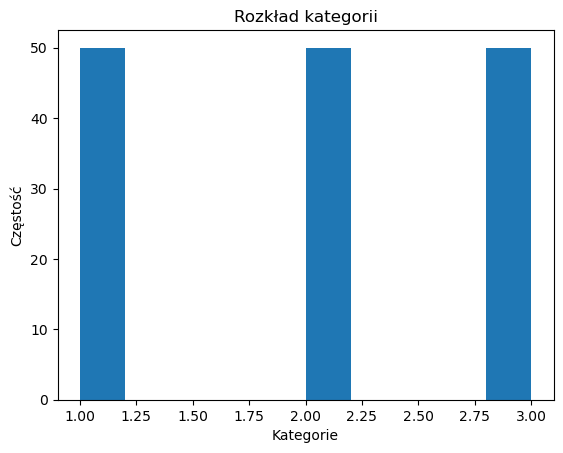

In [7]:
# Rozkładu kategorii, wykres słupkowy  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist( df['class'] )
plt.xlabel('Kategorie')
plt.ylabel('Częstość')
plt.title('Rozkład kategorii')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train,test = train_test_split (df, test_size=50, random_state=50, shuffle = True)

# Tworzyć atrybut docelowy.

X_train = train.iloc[:,:4]
y_train = train.iloc[:,4:] 
X_test = test.iloc[:,:4]
y_test = test.iloc[:,4:] 

print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


In [9]:
# Klasyfikator DT
# Ewaluacja modelu: accuracy-score, 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

tree_clf = DecisionTreeClassifier(max_depth=5, criterion='gini') 
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
#print('F1 measure:', f1_score (y_test, predictions))

#kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#cv_results = cross_val_score(tree_clf, X_train, y_train, cv=kfold, scoring='f1')
#print('Cross validation: mean',  round(cv_results.mean(),2), ', standard deviation: ', round(cv_results.std(),2))

Accuracy: 0.96


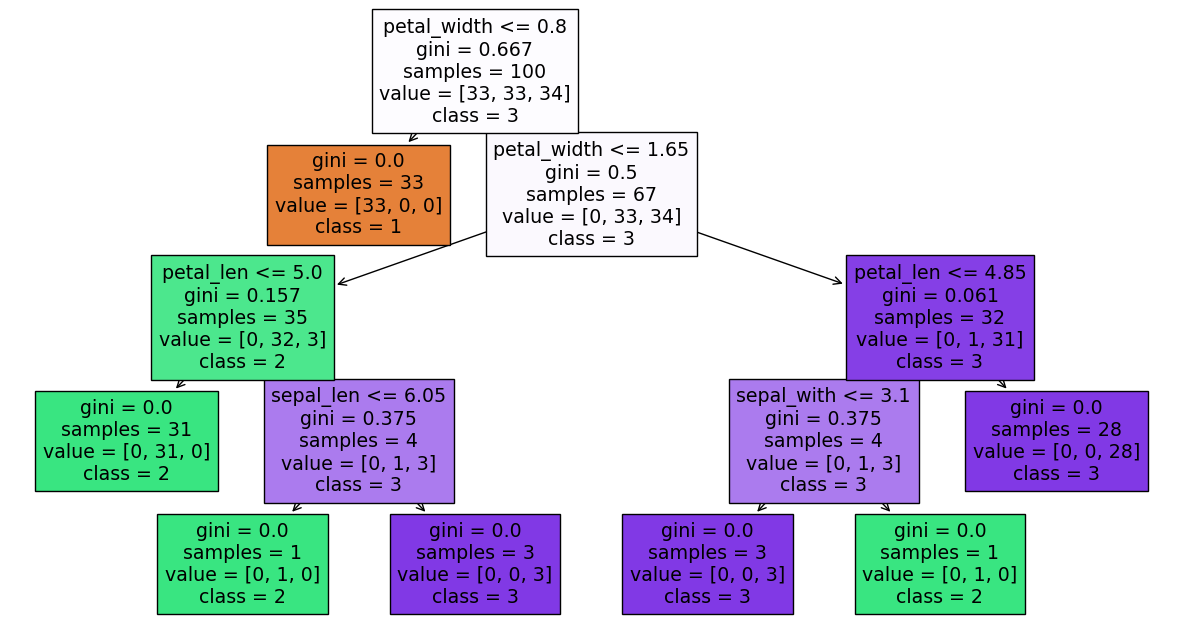

In [10]:
from sklearn import tree 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
t_names = ["1", "2", "3"]
tree.plot_tree(tree_clf, feature_names = f_names, 
                   class_names=t_names, filled = True)
plt.show()

In [11]:
# DT - Text form
from sklearn.tree import export_text
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
r = export_text(tree_clf, feature_names = f_names)
print(r)

|--- petal_width <= 0.80
|   |--- class: 1
|--- petal_width >  0.80
|   |--- petal_width <= 1.65
|   |   |--- petal_len <= 5.00
|   |   |   |--- class: 2
|   |   |--- petal_len >  5.00
|   |   |   |--- sepal_len <= 6.05
|   |   |   |   |--- class: 2
|   |   |   |--- sepal_len >  6.05
|   |   |   |   |--- class: 3
|   |--- petal_width >  1.65
|   |   |--- petal_len <= 4.85
|   |   |   |--- sepal_with <= 3.10
|   |   |   |   |--- class: 3
|   |   |   |--- sepal_with >  3.10
|   |   |   |   |--- class: 2
|   |   |--- petal_len >  4.85
|   |   |   |--- class: 3



In [13]:
# GridSearchCV  
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [5,10,15]
}    

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
#print('F1 measure:', f1_score (y_test, predictions))


best score nan
best param {'criterion': 'gini', 'max_depth': 5}
Accuracy: 0.96


In [15]:
# RF classifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

rf = RandomForestClassifier(n_estimators = 10, criterion = 'log_loss', max_depth = 5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


0.96
[[17  0  0]
 [ 0 16  1]
 [ 0  1 15]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.94      0.94      0.94        17
           3       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



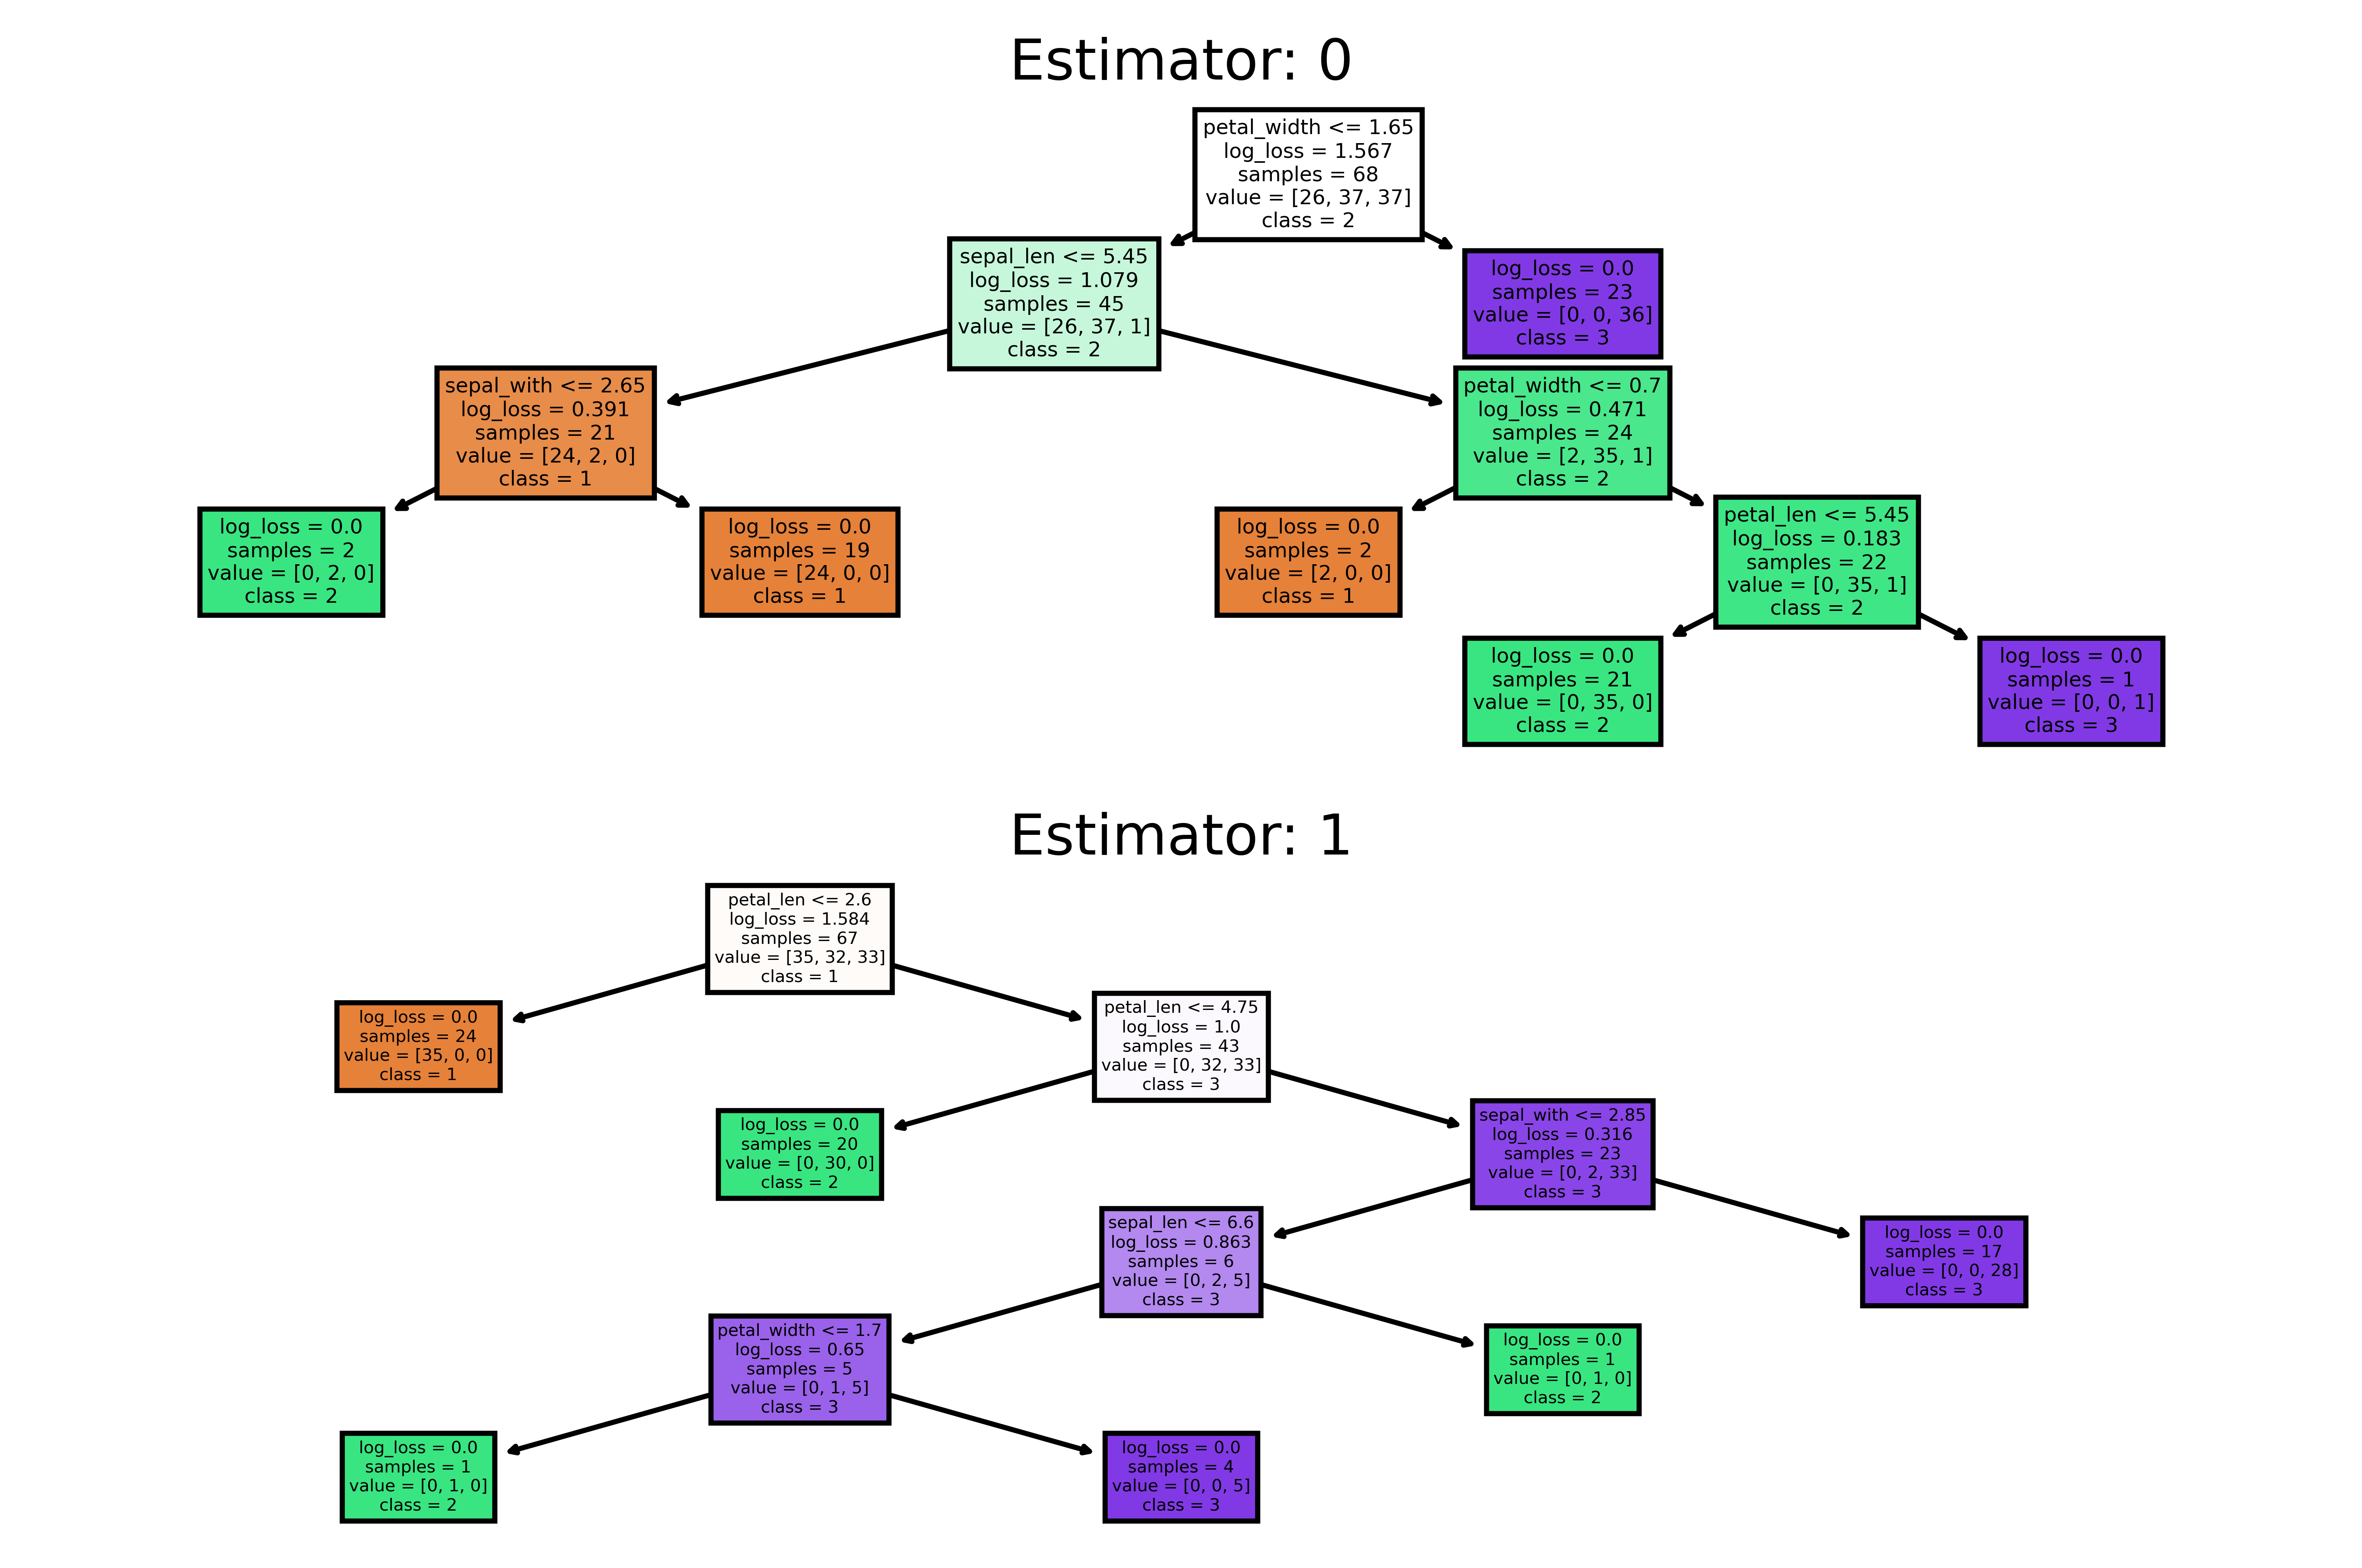

In [16]:
# RF visualization
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
t_names = ["1", "2", "3"]
fig, axes = plt.subplots(nrows = 2,ncols = 1,figsize = (8,5), dpi=900)
for index in range(0, 2):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = f_names, 
                   class_names=t_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)